In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
### drop unecessary columns.

df_index.drop(columns=["Unnamed: 0" ,"year", "month"],axis = 1, inplace=True)

In [4]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [5]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
### visualization of thedataset

import seaborn as sns

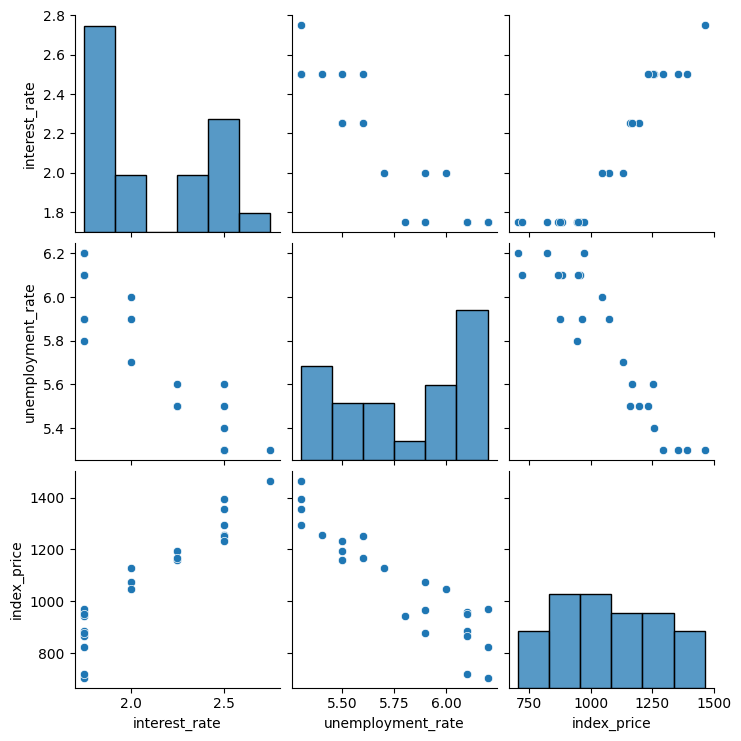

In [7]:
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'interest_rate vs unemployement_rate')

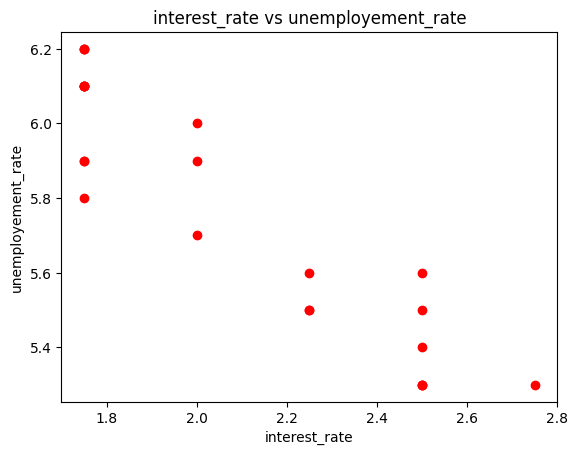

In [9]:
### visualizing the datapoints more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployement_rate')
plt.title('interest_rate vs unemployement_rate')

In [12]:
### independent and dependent feature.

x=df_index[['interest_rate', 'unemployment_rate']]
y=df_index.iloc[:,-1]

In [13]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [14]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [15]:
### train test split

from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [17]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

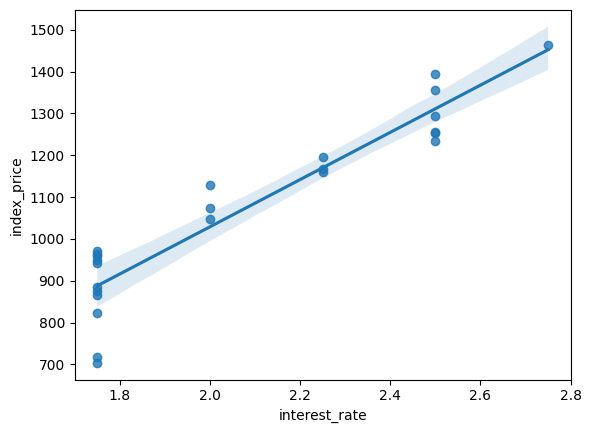

In [20]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

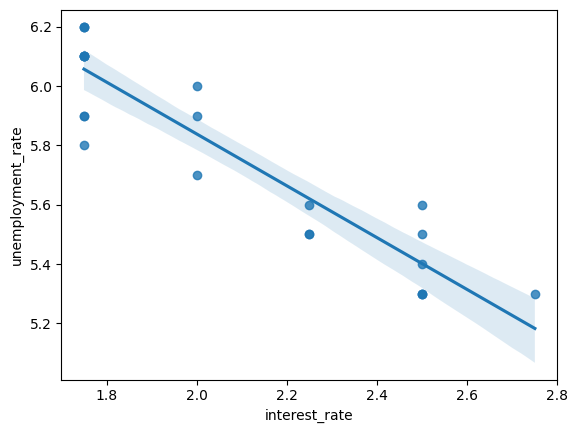

In [22]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_train=scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [26]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [27]:
x_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression()

In [30]:
regression.fit(x_train, y_train)

LinearRegression()

In [31]:
#### cross validation

from sklearn.model_selection import cross_val_score

In [32]:
validation_score = cross_val_score(regression, x_train, y_train, scoring = "neg_mean_squared_error", cv = 3)

In [33]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [34]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [35]:
## prediction

y_prediction = regression.predict(x_test)

In [36]:
y_prediction

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623
